<a href="https://colab.research.google.com/github/Noob919/Fellowship.ai_challenge/blob/main/EDA_on_test_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount(('/content/drive'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image

In [3]:
isola = "/content/drive/MyDrive/train/Isola"
Legacy = "/content/drive/MyDrive/train/Legacy"
M8M10 = "/content/drive/MyDrive/train/M8M10"
Reline = "/content/drive/MyDrive/train/Reline"
Viper = "/content/drive/MyDrive/train/Viper"
Xia = "/content/drive/MyDrive/train/Xia"

A dictionary containing count of each class

In [4]:
number_classes = {'Isola': len(os.listdir(isola)),
'Legacy': len(os.listdir(Legacy)),
'M8M10': len(os.listdir(M8M10)),
'Reline': len(os.listdir(Reline)),
'Viper': len(os.listdir(Viper)),
'Xia': len(os.listdir(Xia))}


Barplot 

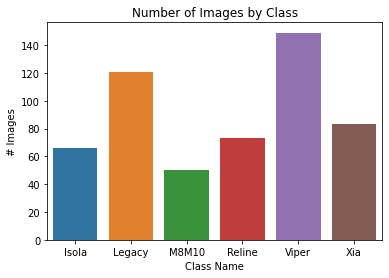

In [6]:
x  = list(number_classes.keys())
y = list(number_classes.values())
sns.barplot(x= x, y=y);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

Shape of each image stored in a list then convert that list into dataframe for scatter plot

In [7]:
class_isola = []
filename_isola = os.listdir("/content/drive/MyDrive/train/Isola")
for img_name_isola in filename_isola:
  file = os.path.join("/content/drive/MyDrive/train/Isola/" + img_name_isola)
  img = Image.open(file)
  size =  img.size
  class_isola.append(size)

isola_size_df  = pd.DataFrame(class_isola)
isola_size_df.columns = ['width', 'height']

class_M = []
filename_M = os.listdir("/content/drive/MyDrive/train/M8M10")
for img_name_M in filename_M:
  file = os.path.join("/content/drive/MyDrive/train/M8M10/"+ img_name_M)
  img = Image.open(file)
  size =  img.size
  class_M.append(size)

M8M10_size_df  = pd.DataFrame(class_M)
M8M10_size_df.columns = ['width', 'height']


class_legacy = []
filename_legacy = os.listdir("/content/drive/MyDrive/train/Legacy")
for img_name_legacy in filename_legacy:
  file = os.path.join("/content/drive/MyDrive/train/Legacy/"+img_name_legacy)
  img = Image.open(file)
  size =  img.size
  class_legacy.append(size)

legacy_size_df  = pd.DataFrame(class_legacy)
legacy_size_df.columns = ['width', 'height']

class_Reline = []
filename_reline = os.listdir("/content/drive/MyDrive/train/Reline")
for img_name_reline in filename_reline:
  file = os.path.join("/content/drive/MyDrive/train/Reline/"+ img_name_reline)
  img = Image.open(file)
  size =  img.size
  class_Reline.append(size)

reline_size_df  = pd.DataFrame(class_Reline)
reline_size_df.columns = ['width', 'height']

class_viper = []
filename_viper = os.listdir("/content/drive/MyDrive/train/Viper")
for img_name_viper in filename_viper:
  file = os.path.join("/content/drive/MyDrive/train/Viper/"+ img_name_viper)
  img = Image.open(file)
  size =  img.size
  class_viper.append(size)

viper_size_df  = pd.DataFrame(class_viper)
viper_size_df.columns = ['width', 'height']

class_xia = []
filename_xia = os.listdir("/content/drive/MyDrive/train/Xia")
for img_name_xia in filename_xia:
  file = os.path.join("/content/drive/MyDrive/train/Xia/"+ img_name_xia)
  img = Image.open(file)
  size =  img.size
  class_xia.append(size)


xia_size_df  = pd.DataFrame(class_xia)
xia_size_df.columns = ['width', 'height']


Scaterplot of dimension of each image

Text(0.5, 1.0, 'Image Sizes (pixels) | Class Xia')

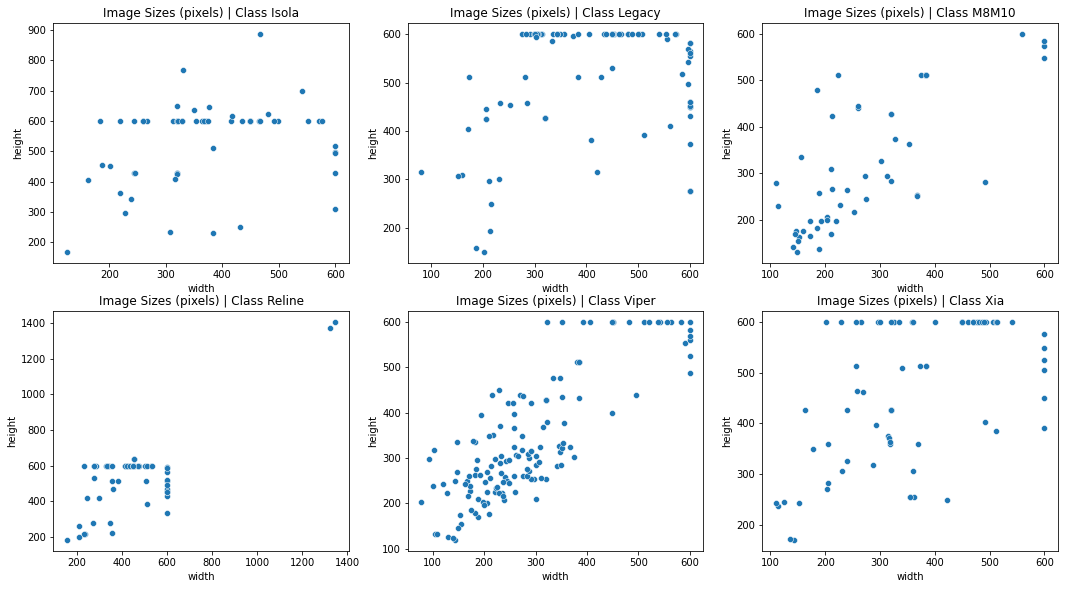

In [8]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.scatterplot(x = isola_size_df['width'], y = isola_size_df['height'])
plt.title('Image Sizes (pixels) | Class Isola')
plt.subplot(3,3,2)
sns.scatterplot(x = legacy_size_df['width'], y = legacy_size_df['height'])
plt.title('Image Sizes (pixels) | Class Legacy')
plt.subplot(3,3,3)
sns.scatterplot(x = M8M10_size_df['width'], y = M8M10_size_df['height'])
plt.title('Image Sizes (pixels) | Class M8M10')
plt.subplot(3,3,4)
sns.scatterplot(x = reline_size_df['width'], y = reline_size_df['height'])
plt.title('Image Sizes (pixels) | Class Reline')
plt.subplot(3,3,5)
sns.scatterplot(x = viper_size_df['width'], y = viper_size_df['height'])
plt.title('Image Sizes (pixels) | Class Viper')
plt.subplot(3,3,6)
sns.scatterplot(x = xia_size_df['width'], y = xia_size_df['height'])
plt.title('Image Sizes (pixels) | Class Xia')


In [9]:
categories = os.listdir("/content/drive/MyDrive/train/")

In [10]:
categories

['Xia', 'M8M10', 'Isola', 'Legacy', 'Viper', 'Reline']

In [14]:
# Converting all images into jpg
def PNG_to_JPG(path):
 org_data=[]
 for category in categories:
   image_list=[]
   folder_path=os.path.join(path,category)
   img_names=os.listdir(folder_path)
   #change the extension of all images to jpg
   for img_name in img_names:
     filename=img_name[:-3]
     extension=img_name[-3:]
     img_path=os.path.join(folder_path,img_name)
     img=cv2.imread(img_path)
     if extension !='jpg':
       img_name=filename +".jpg"
       cv2.imwrite(img_name,img)
     org_data.append(img)
    
 return(org_data)

In [15]:
Images = PNG_to_JPG("/content/drive/MyDrive/train/")

Normalizing all the images in the train set

In [16]:
def normalize(image_set):
  normalized = [img/255 for img in image_set]
  return normalized

Shape of first image

In [17]:
normalize_images = normalize(Images)
normalize_images = np.array(normalize_images)
normalize_images[0].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(600, 472, 3)